## EDA notebook for Break-Cancer Diagnosis

### Importing necessary packages, and libraries

In [27]:
# Installing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import logging.handlers
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import os
import sys

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from project_config import Config
from FileHandler import FileHandler
from log import logger
from data_processor import data_processor
from plot import Plot

### Creating the Classes objects for the scripts

In [3]:
file = FileHandler()
log = logger('eda_logs')
# plot = plot()
file_config = Config()
data_processor = data_processor()
plot = Plot()

### Impoting dataset, and describing the data

In [4]:
# print(Config.Data_path)
df = file.csv_file_read("data")
print("Dataset columns are: ", df.columns)
df.info()

Dataset columns are:  Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    

### Describing the dataset, Missing Valriables

In [5]:
# Percentage % of total missing values in the dataset

percent = data_processor.total_percent_missing_data(df)
print("The dataset contains a Total of ", percent, "%", "missing values.")

The dataset contains a Total of  3.03 % missing values.


In [6]:
percent_column_df = data_processor.missing_data_per_column(df)
percent_column_df

,Column,No. of Missing Values,% Missing Values per column
0,id,0,0.0 %
1,diagnosis,0,0.0 %
2,radius_mean,0,0.0 %
3,texture_mean,0,0.0 %
4,perimeter_mean,0,0.0 %
5,area_mean,0,0.0 %
6,smoothness_mean,0,0.0 %
7,compactness_mean,0,0.0 %
8,concavity_mean,0,0.0 %
9,concave points_mean,0,0.0 %


### The missing values, belongs to "Unnamed:32" column

## Droping the "Unnamed:32", and "id" column because it has no any statistical meaning

In [7]:
columns = ["id", "Unnamed: 32"]
df = data_processor.drop_columns(df, columns)
len(df.columns)

31

## Univariate Analysis

1. Diagnosis column

B    357
M    212
Name: diagnosis, dtype: int64


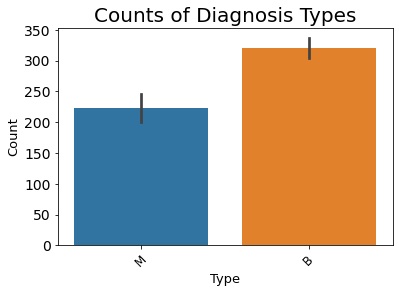

In [8]:
print(df.diagnosis.value_counts())
plot.plot_bar(df, x_col='diagnosis', y_col= df.diagnosis.index, title="Counts of Diagnosis Types", xlabel="Type", ylabel="Count")

### 2. All Other columns are in float datatype values, Describing in terms of statistical values

## Splitting columns by fields for better analysis

In [9]:
mean_columns = df.iloc[:, 1:11]
se_columns = df.iloc[:, 11: 21]
worst_columns = df.iloc[:, 21:31]

In [10]:
mean_columns.columns
# se_columns.columns
# worst_columns.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

### Describing these columns

In [11]:
mean_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
texture_mean,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
concavity_mean,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
concave points_mean,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744


In [12]:
se_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_se,569.0,0.405172,0.277313,0.111500,0.232400,0.324200,0.478900,2.87300
texture_se,569.0,1.216853,0.551648,0.360200,0.833900,1.108000,1.474000,4.88500
perimeter_se,569.0,2.866059,2.021855,0.757000,1.606000,2.287000,3.357000,21.98000
area_se,569.0,40.337079,45.491006,6.802000,17.850000,24.530000,45.190000,542.20000
smoothness_se,569.0,0.007041,0.003003,0.001713,0.005169,0.006380,0.008146,0.03113
compactness_se,569.0,0.025478,0.017908,0.002252,0.013080,0.020450,0.032450,0.13540
concavity_se,569.0,0.031894,0.030186,0.000000,0.015090,0.025890,0.042050,0.39600
concave points_se,569.0,0.011796,0.006170,0.000000,0.007638,0.010930,0.014710,0.05279
symmetry_se,569.0,0.020542,0.008266,0.007882,0.015160,0.018730,0.023480,0.07895
fractal_dimension_se,569.0,0.003795,0.002646,0.000895,0.002248,0.003187,0.004558,0.02984


In [13]:
worst_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_worst,569.0,16.269190,4.833242,7.93000,13.01000,14.97000,18.79000,36.0400
texture_worst,569.0,25.677223,6.146258,12.02000,21.08000,25.41000,29.72000,49.5400
perimeter_worst,569.0,107.261213,33.602542,50.41000,84.11000,97.66000,125.40000,251.2000
area_worst,569.0,880.583128,569.356993,185.20000,515.30000,686.50000,1084.00000,4254.0000
smoothness_worst,569.0,0.132369,0.022832,0.07117,0.11660,0.13130,0.14600,0.2226
compactness_worst,569.0,0.254265,0.157336,0.02729,0.14720,0.21190,0.33910,1.0580
concavity_worst,569.0,0.272188,0.208624,0.00000,0.11450,0.22670,0.38290,1.2520
concave points_worst,569.0,0.114606,0.065732,0.00000,0.06493,0.09993,0.16140,0.2910
symmetry_worst,569.0,0.290076,0.061867,0.15650,0.25040,0.28220,0.31790,0.6638
fractal_dimension_worst,569.0,0.083946,0.018061,0.05504,0.07146,0.08004,0.09208,0.2075


## Outliers
### Selecting Randomly few samples

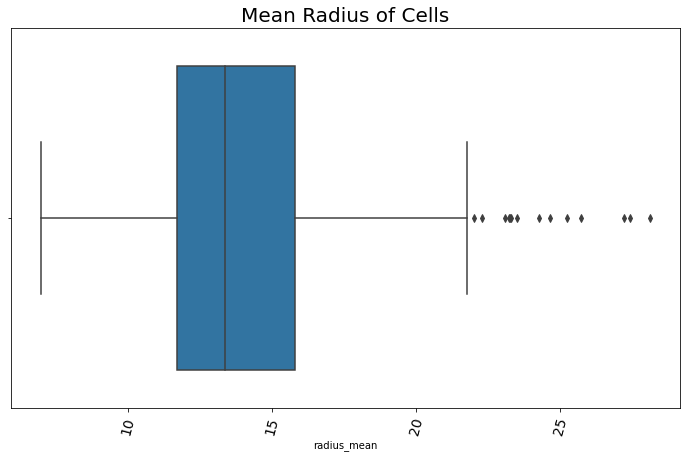

In [14]:
plot.plot_box(df, "radius_mean", "Mean Radius of Cells")

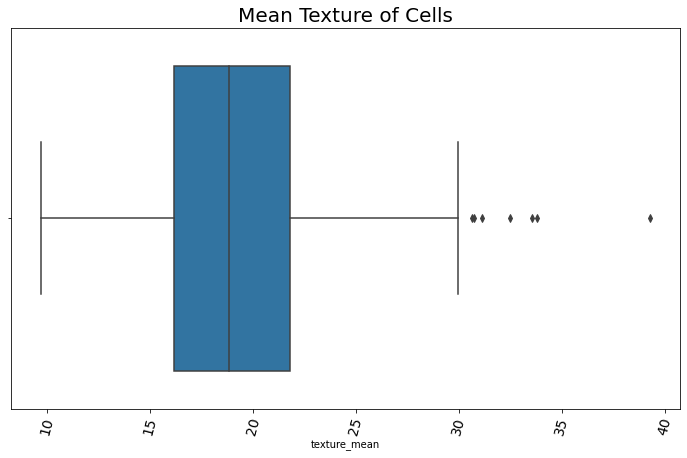

In [48]:
plot.plot_box(df, "texture_mean", "Mean Texture of Cells")

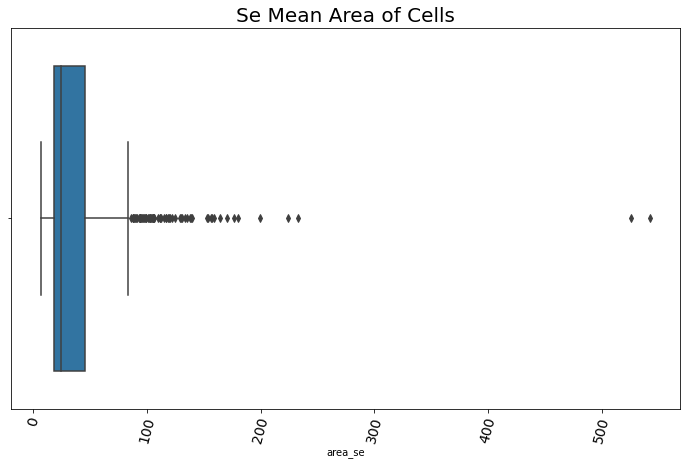

In [49]:
plot.plot_box(df, "area_se", "Se Mean Area of Cells")

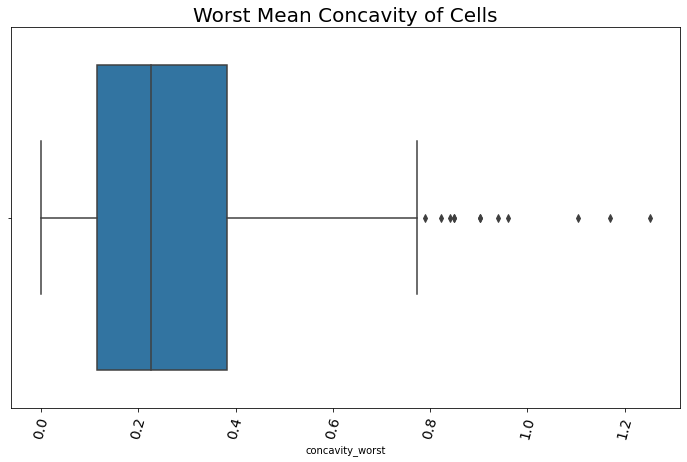

In [50]:
plot.plot_box(df, "concavity_worst", "Worst Mean Concavity of Cells")

## Treating Outliers
### Removing Outliers using Median Method

In [15]:
mean_column_list = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                    'smoothness_mean', 'compactness_mean', 'concavity_mean',
                    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
se_column_list = ['radius_se', 'texture_se', 'perimeter_se', 'area_se',
                  'smoothness_se', 'compactness_se', 'concavity_se',
                  'concave points_se', 'symmetry_se', 'fractal_dimension_se']
worst_column_list = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                     'smoothness_worst', 'compactness_worst', 'concavity_worst',
                     'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

lists = [mean_column_list, se_column_list, worst_column_list]
# Fixing Outliers 
for list in lists:    
    data_processor.fix_outlier(df, list)

## Converting Categorical values (diagnosis column) into Numerical values using hot encoding 

In [52]:
df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])
df.sample(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
98,0,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,...,13.06,17.16,82.96,512.5,0.1431,0.1851,0.1922,0.08449,0.2772,0.08756
452,0,12.00,18.84,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,13.09,25.41,85.07,523.7,0.1208,0.1856,0.1811,0.07116,0.2447,0.08194
373,1,13.37,17.35,134.80,551.1,0.09446,0.10760,0.15270,0.08941,0.1571,...,25.37,23.17,166.80,1946.0,0.1562,0.3055,0.4159,0.21120,0.2689,0.07055


### In diagnosis column, Malignant, and Benign diagnosis are mapped to 1, and 0 respectivelly

## Saving the new and Outliers-free dataset

In [29]:
# Saving the Processed dataset

file.csv_file_save(df, "processed_data")

## Checking if the Outliers have been eliminated

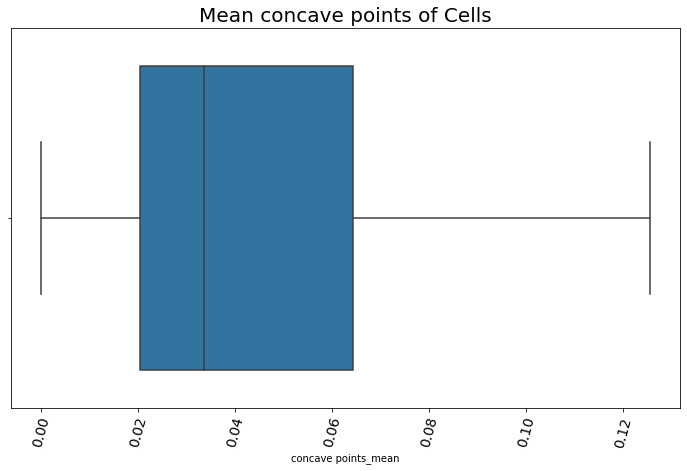

In [30]:
plot.plot_box(df, "concave points_mean", "Mean concave points of Cells")

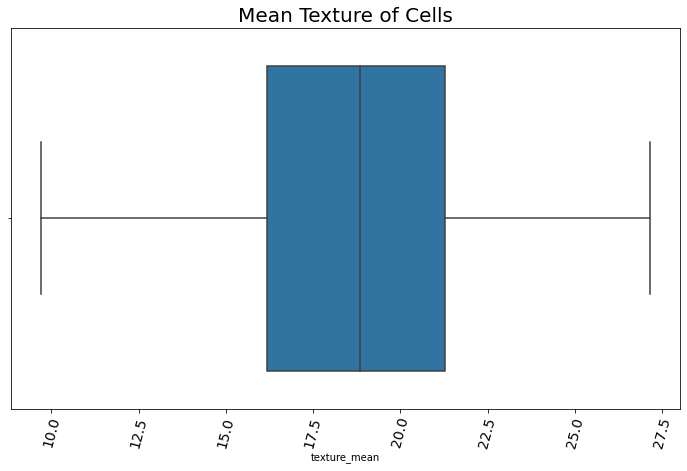

In [31]:
plot.plot_box(df, "texture_mean", "Mean Texture of Cells")

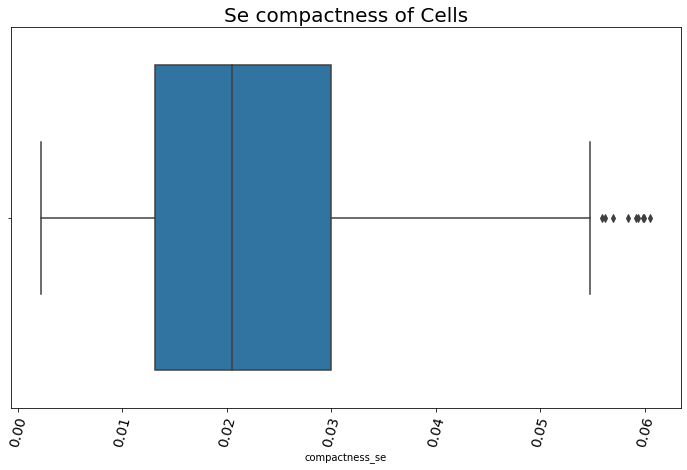

In [32]:
plot.plot_box(df, "compactness_se", "Se compactness of Cells")

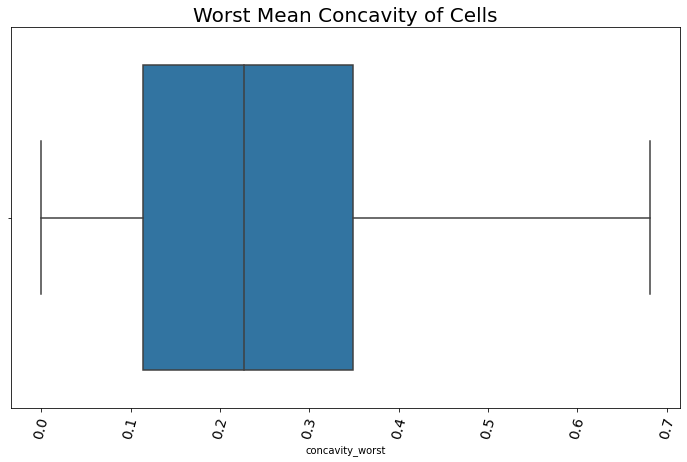

In [33]:
plot.plot_box(df, "concavity_worst", "Worst Mean Concavity of Cells")

## Splitting the data after treating the Outliers

In [44]:
mean_columns = df.iloc[:, 0:11]
se_columns = df.iloc[:, 11: 21]
worst_columns = df.iloc[:,21:31]
se_columns["diagnosis"] = df.iloc[:, 0:1]
worst_columns["diagnosis"] = df.iloc[:, 0:1]

In [47]:
mean_columns
# se_columns
# worst_columns

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.09263,0.06154,0.03350,0.1792,0.06154
1,1,20.57,17.77,132.90,551.1,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.03350,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.09587,0.09263,0.24140,0.10520,0.1792,0.06154
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,13.37,22.39,86.24,551.1,0.11100,0.11590,0.06154,0.03350,0.1726,0.05623
565,1,20.13,18.84,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,18.84,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,13.37,18.84,86.24,1265.0,0.11780,0.09263,0.06154,0.03350,0.1792,0.07016


## Multi-variate Analysis

### Ploting a Confusion Matrix to understand and see the relation between the features/columns

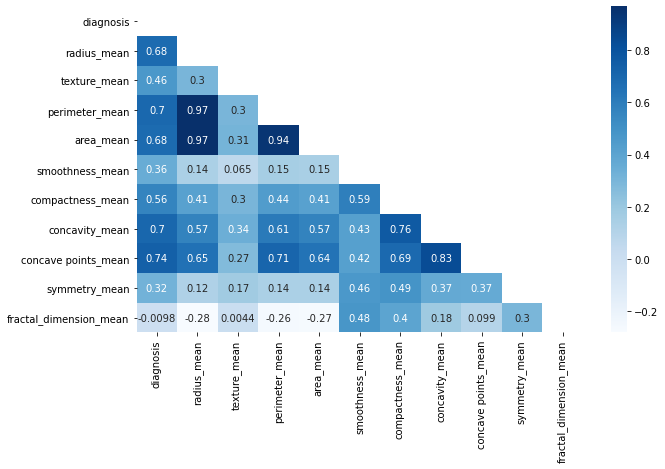

In [48]:
plot.heat(mean_columns, "Blues", (10,6))

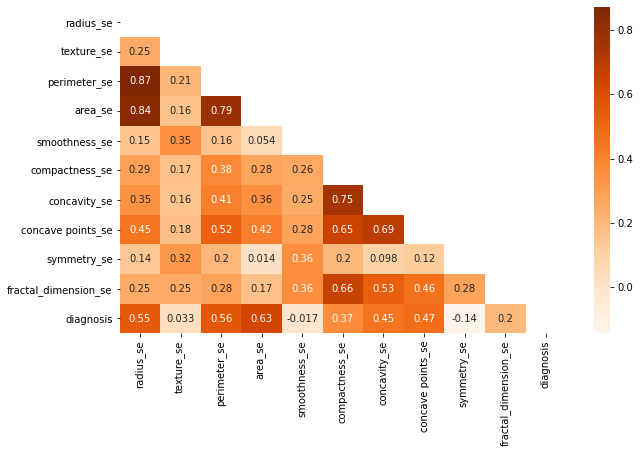

In [49]:
plot.heat(se_columns, "Oranges", (10,6))

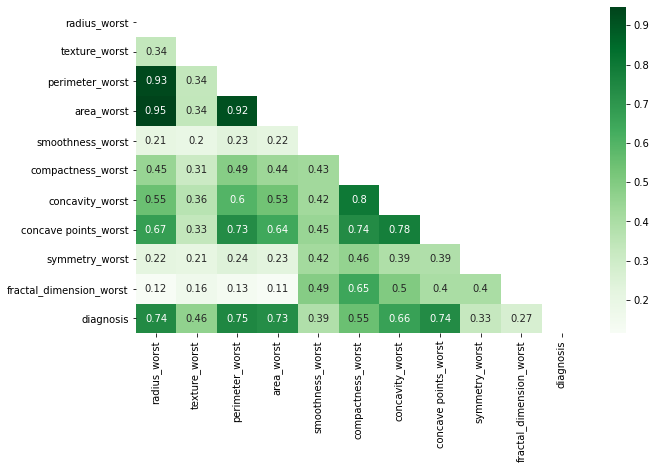

In [50]:
plot.heat(worst_columns, "Greens", (10,6))

In [ ]:
# Finding features with Higher correlations to diagnosis
high_corr_data = df.corr()
high_corr_columns = high_corr_data.index[abs(high_corr_data['diagnosis'])>=0.5]
high_corr_columns

### Deductions from the Multi-variate Analysis, There is relation between these features,
### - Summarizing with Highest correlations

1. perimeter - radius
2. area - radius
3. area - perimeter
4. concavity - compactness
5. fractal_dimension - compactness
6. concave points - compactness
7. concave points - concavity
8. concave points - radius
9. concave points - perimeter
10. concave points - area

### - Summary on Correlation between Diagnosis and other features, considering a relativelly higher correlations to less
1. diagnosis - concave points, perimeter, concativity, radius, area, and compactness - In case of mean values
2. diagnosis - perimeter, radius, concave points, area, concativity, compactness - In case of worst values
3. diagnosis - area, perimeter, radius, concave points, , concativity- In case of se values

### Showing the Relationship of these features using Scatter plot

In [60]:
fields = ["mean", "se","worst"]
plot.scatter_feature_plot(df, "perimeter", "radius", "Relation between Perimeter & Radius", fields)

In [61]:
plot.scatter_feature_plot(df, "area", "perimeter", "Relation between Area & Perimeter", fields)

In [62]:
plot.scatter_feature_plot(df, "area", "radius", "Relation between Area & Radius", fields)

In [63]:
plot.scatter_feature_plot(df, "concavity", "compactness", "Relation between concavity & compactness", fields)

In [64]:
plot.scatter_feature_plot(df, "fractal_dimension", "compactness", "Relation between fractal_dimension & compactness", fields)